# The Iris Dataset

The data set contains 3 different types of irises (Setosa, Versicolour, and Virginica) with 50 instances each.
The data can be downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Iris), or we can load it from built-in function of some library like scikit-learn.

![Iris image](./Large53.jpg)


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

%matplotlib inline

### Attribute Information
Each data contains 5 attributes: Sepal Length, Sepal Width, Petal Length, Petal Width and class.
We want to predict the class of the flower based on available attributes.

### Load dataset

In [2]:
iris = datasets.load_iris()

### Analyze

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris_xpd = pd.DataFrame(iris['data'], columns = iris['feature_names'])
print(iris_xpd)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6     

In [6]:
iris_ypd = pd.DataFrame(iris['target'], columns = ['class'])
print(iris_ypd)

     class
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
..     ...
120      2
121      2
122      2
123      2
124      2
125      2
126      2
127      2
128      2
129      2
130      2
131      2
132      2
133      2
134      2
135      2
136      2
137      2
138      2
139      2
140      2
141      2
142      2
143      2
144      2
145      2
146      2
147      2
148      2
149      2

[150 rows x 1 columns]


In [7]:
print(iris_xpd.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [8]:
print(iris_ypd.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


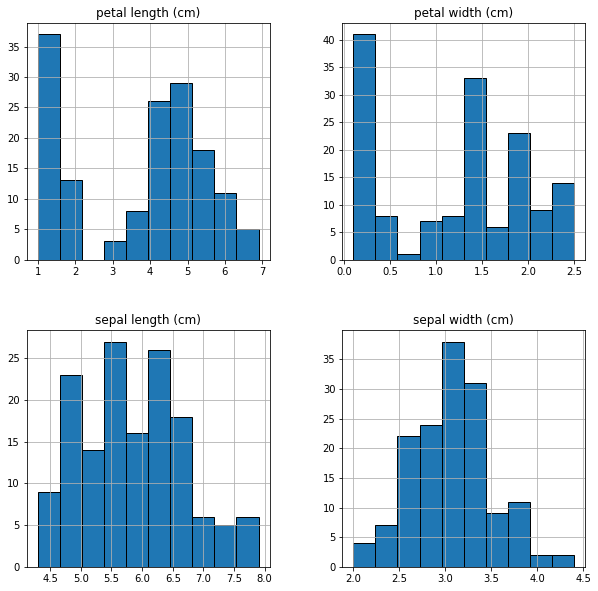

In [9]:
hist = iris_xpd.hist(edgecolor = 'black', figsize = (10, 10))

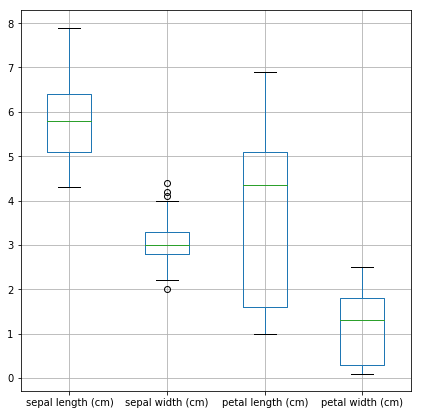

In [10]:
box = iris_xpd.boxplot(grid = True, figsize = (7, 7))

In [11]:
dlist = list(map(list, zip(*iris['data'])))

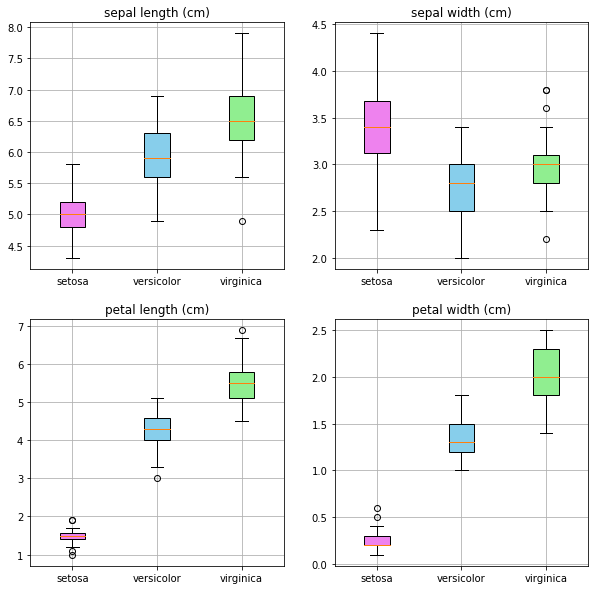

In [12]:
fig = plt.figure(figsize = (10, 10))
colors = ['violet', 'skyblue', 'lightgreen']
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.grid(True)
    bplot = ax.boxplot([dlist[i][:50],dlist[i][51:100],dlist[i][101:150]], patch_artist=True, labels = iris['target_names'])
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    plt.title(iris['feature_names'][i])
plt.show()

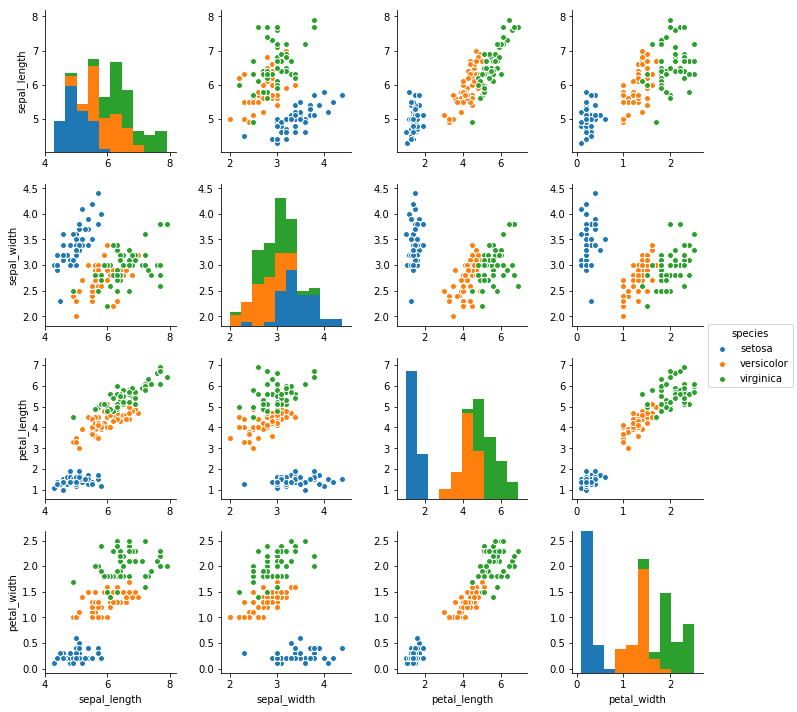

In [13]:
import seaborn as sns
sns.pairplot(sns.load_dataset("iris"), hue="species")

From the plot above we can see that Setosa specoes is sperated from Versicolor and Virginica across all features.

The other two species are also linear separable.

## Applying classification model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.2, random_state = 42)

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ', accuracy_score(y_pred, y_test)*100,'%')

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

accuracy score:  100.0 %
